In [1]:
# Essential libraries for data manipulation, visualization, and analysis
import pandas as pd  # Data handling with DataFrames
import numpy as np  # Numerical operations
# Visualization libraries
import matplotlib.pyplot as plt  # Static visualizations
import seaborn as sns  # Advanced statistical plots
# Machine learning preprocessing and metrics
from sklearn.preprocessing import RobustScaler  # Scaling robust to outliers
from sklearn.metrics import silhouette_score  # Clustering quality evaluation
# Machine learning models
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.cluster import KMeans  # K-Means clustering
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Online Sales Data.csv') # Load the dataset into a pandas DataFrame

In [5]:
data.head()  # Displays the first 5 rows of the dataset

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [7]:
data.info()  # Provides a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [9]:
numeric_columns = data.select_dtypes(include=['number'])  # Filters columns with numeric data types

In [11]:
# Calculating Statistical Moments
# These statistics provide valuable insights into the distribution and characteristics of the data.
stats_moments = pd.DataFrame({
    'Mean': numeric_columns.mean(),
    'Median': numeric_columns.median(),
    'Standard Deviation': numeric_columns.std(),
    'Skewness': numeric_columns.skew(),
    'Kurtosis': numeric_columns.kurt()})
stats_moments

,Mean,Median,Standard Deviation,Skewness,Kurtosis
Transaction ID,10120.500000,10120.50,69.426220,0.000000,-1.200000
Units Sold,2.158333,2.00,1.322454,1.620895,4.775699
Unit Price,236.395583,89.99,429.446695,4.566664,28.234405
Total Revenue,335.699375,179.97,485.804469,3.523183,16.681918


In [13]:
def draw_corr_pairplot(df):
    """
    Generates a pairplot to visualize pairwise relationships and correlations between numerical columns.
    """
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    
    # Create pairplot
    sns.pairplot(numerical_columns, corner=True, diag_kind="kde", plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot of Numerical Columns', y=1.02, fontsize=14)
    plt.show()

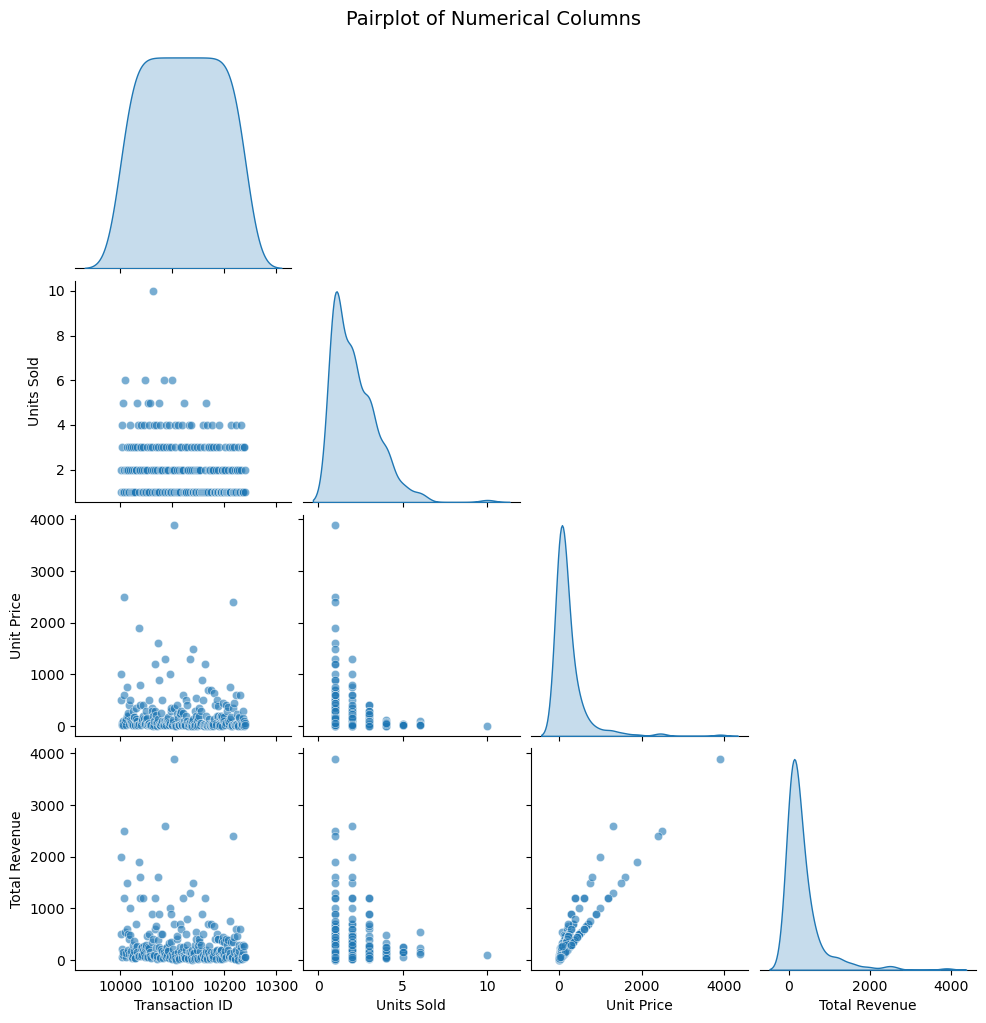

In [19]:
draw_corr_pairplot(numeric_columns)

In [25]:
def plot_payment_method_distribution_pie(df):
    """
    Creates a pie chart showing the distribution of Payment Method.
    """
    payment_method_counts = df['Payment Method'].value_counts()  # Count occurrences of each payment method

    plt.figure(figsize=(8,8))
    payment_method_counts.plot.pie(
        autopct='%1.1f%%',  # Display percentages
        colors=sns.color_palette('viridis', len(payment_method_counts)),  # Use a color palette
    )
    plt.title("Distribution of Payments by Method", fontsize=14)
    plt.ylabel("")  # Remove the y-axis label
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

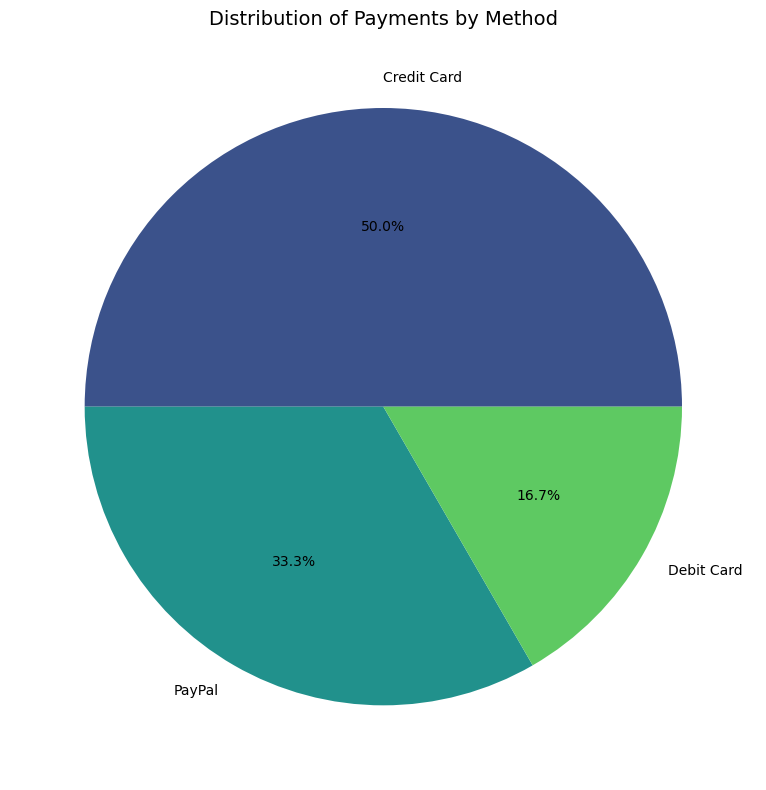

In [27]:
plot_payment_method_distribution_pie(data)

In [33]:
def simple_linear_fit_with_predictions(df, x_col, y_col, new_x=None):
    """
    Fits a simple linear regression model, plots the regression line with confidence intervals, 
    and optionally predicts values for new data points.
    
    Parameters:
    - df : DataFrame : The dataset containing the data.
    - x_col : str : The name of the independent variable (feature).
    - y_col : str : The name of the dependent variable (target).
    - new_x : array-like, optional : New data points to predict. Default is None.
    
    Returns:
    - model : LinearRegression : The trained linear regression model.
    - new_y_pred : array-like : Predictions for new data points (if provided).
    """
    # Step 1: Extract the data for X (independent) and Y (dependent) variables
    x = df[x_col].values.reshape(-1, 1)  # Reshape for a single feature
    y = df[y_col].values  # Dependent variable (target)

    # Step 2: Train the linear regression model
    model = LinearRegression()
    model.fit(x, y)
    
    # Step 3: Generate predictions for the original data
    y_pred = model.predict(x)
    
    # Step 4: Predict for new data points if provided
    new_y_pred = None
    if new_x is not None:
        new_x = np.array(new_x).reshape(-1, 1)
        new_y_pred = model.predict(new_x)
        print("Predictions for new data points:")
        for i, pred in enumerate(new_y_pred):
            print(f"  x = {new_x[i][0]:.2f}, Predicted y = {pred:.2f}")

    # Step 5: Plot the original data and the linear regression line with confidence intervals
    plt.figure(figsize=(10, 6))
    
    # Scatter plot and regression line with confidence intervals
    sns.regplot(x=x.flatten(), y=y, ci=95, scatter_kws={'color': 'teal', 's': 50, 'alpha': 0.7}, 
                line_kws={'color': 'darkorange', 'linewidth': 2})
    
    # Title and labels
    plt.title(f'Linear Regression of {y_col} vs {x_col} with 95% Confidence Interval', fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(['Data points', 'Regression line', 'Confidence interval'], loc='upper left')

    
    # Additional plot customization
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    return model, new_y_pred


Predictions for new data points:
  x = 90.00, Predicted y = 181.63
  x = 91.00, Predicted y = 182.68
  x = 98.00, Predicted y = 190.05


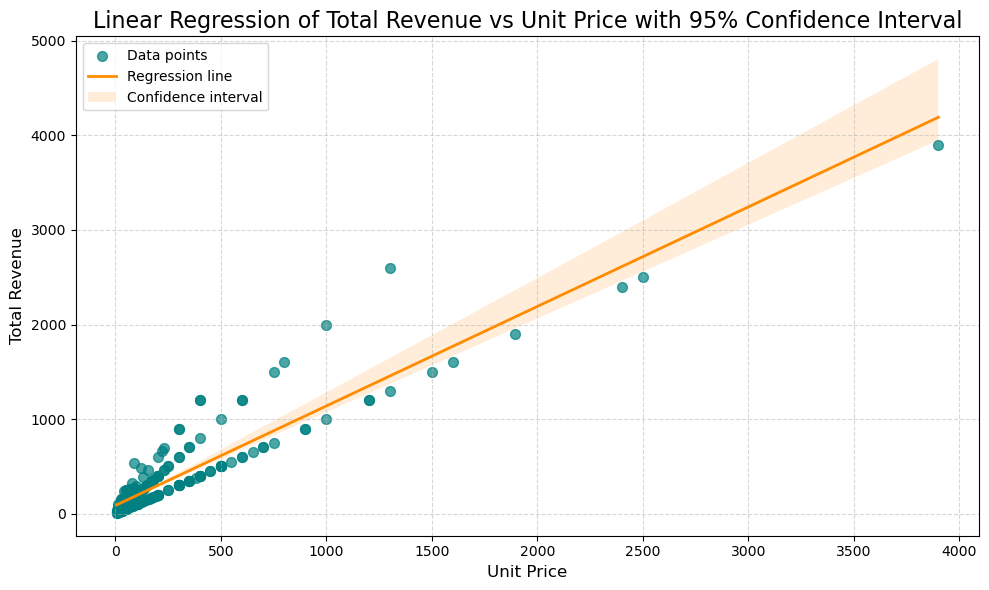

In [35]:
new_x = [90, 91, 98]  # New x-values for prediction
model, new_y_pred = simple_linear_fit_with_predictions(data, 'Unit Price', 'Total Revenue', new_x)

In [39]:
# Select relevant columns for clustering
data_for_clustering = data[['Unit Price', 'Total Revenue']].dropna()  # Drop rows with missing values

# Scale the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_for_clustering)


In [41]:
def compute_silhouette_and_inertia(cluster_count, data):
    """ 
    Calculates silhouette score and inertia for a given number of clusters.
    """
    kmeans_model = KMeans(n_clusters=cluster_count, n_init=20)
    kmeans_model.fit(data)  # Fit the model to the data
    labels = kmeans_model.labels_
    
    # Calculate silhouette score and inertia
    silhouette = silhouette_score(data, labels)
    inertia = kmeans_model.inertia_

    return silhouette, inertia


In [43]:
wcss_values = []
optimal_cluster_count, best_silhouette_score = None, -np.inf

# Loop through possible cluster counts and calculate silhouette score and inertia
for clusters in range(2, 11):  # Test from 2 to 10 clusters
    silhouette, inertia = compute_silhouette_and_inertia(clusters, scaled_data)
    wcss_values.append(inertia)
    
    # Update the best silhouette score and optimal cluster count
    if silhouette > best_silhouette_score:
        optimal_cluster_count = clusters
        best_silhouette_score = silhouette
        
    print(f"{clusters} clusters silhouette score = {silhouette:.2f}")

print(f"Optimal number of clusters = {optimal_cluster_count}")


2 clusters silhouette score = 0.82
3 clusters silhouette score = 0.74
4 clusters silhouette score = 0.64
5 clusters silhouette score = 0.64
6 clusters silhouette score = 0.61
7 clusters silhouette score = 0.51
8 clusters silhouette score = 0.53
9 clusters silhouette score = 0.51
10 clusters silhouette score = 0.50
Optimal number of clusters = 2


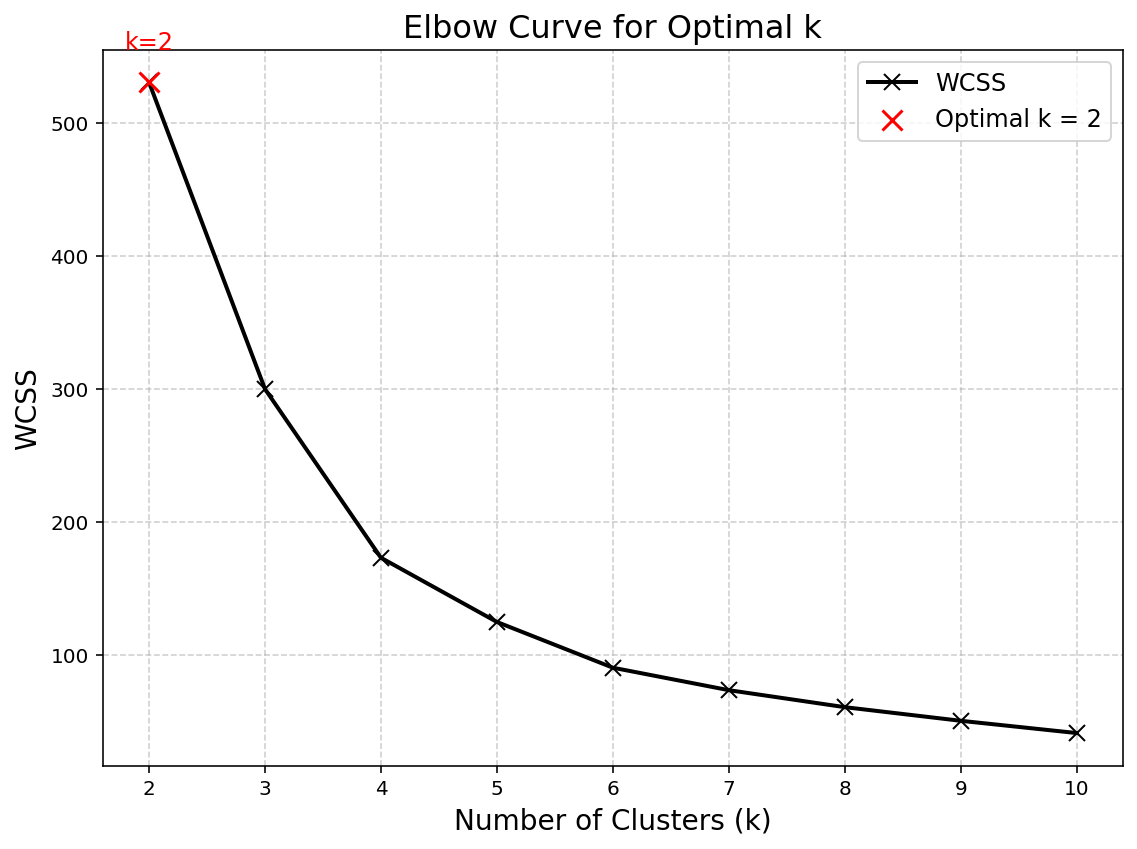

In [44]:
def plot_elbow_curve(min_clusters, max_clusters, wcss_values, optimal_clusters):
    """
    Plots the elbow curve to determine the best number of clusters (k).
    Parameters:
    - min_clusters (int): The minimum number of clusters to consider.
    - max_clusters (int): The maximum number of clusters to consider.
    - wcss_values (list or array): List of Within-Cluster Sum of Squares for each k.
    - optimal_clusters (int): The optimal number of clusters as determined by silhouette score.
    """
    # Create a plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=144)
    
    # Plot WCSS values with black line
    cluster_range = range(min_clusters, max_clusters + 1)
    ax.plot(cluster_range, wcss_values, marker='x', color='black', label='WCSS', markersize=8, linewidth=2)
    
    # Mark the optimal number of clusters with crosses
    ax.scatter(optimal_clusters, wcss_values[optimal_clusters - min_clusters], color='red', edgecolor='black', s=100, zorder=5, marker='x', label=f'Optimal k = {optimal_clusters}')
    ax.annotate(
        f'k={optimal_clusters}',
        xy=(optimal_clusters, wcss_values[optimal_clusters - min_clusters]),
        xytext=(optimal_clusters, wcss_values[optimal_clusters - min_clusters] + (max(wcss_values) - min(wcss_values)) * 0.05),
        fontsize=12,
        color='red',
        ha='center'
    )
    
    # Customize plot
    ax.set_xlabel('Number of Clusters (k)', fontsize=14)
    ax.set_ylabel('WCSS', fontsize=14)
    ax.set_title('Elbow Curve for Optimal k', fontsize=16)
    ax.set_xticks(cluster_range)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Display legend
    ax.legend(fontsize=12)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Plot the elbow curve
plot_elbow_curve(2, 10, wcss_values, optimal_cluster_count)


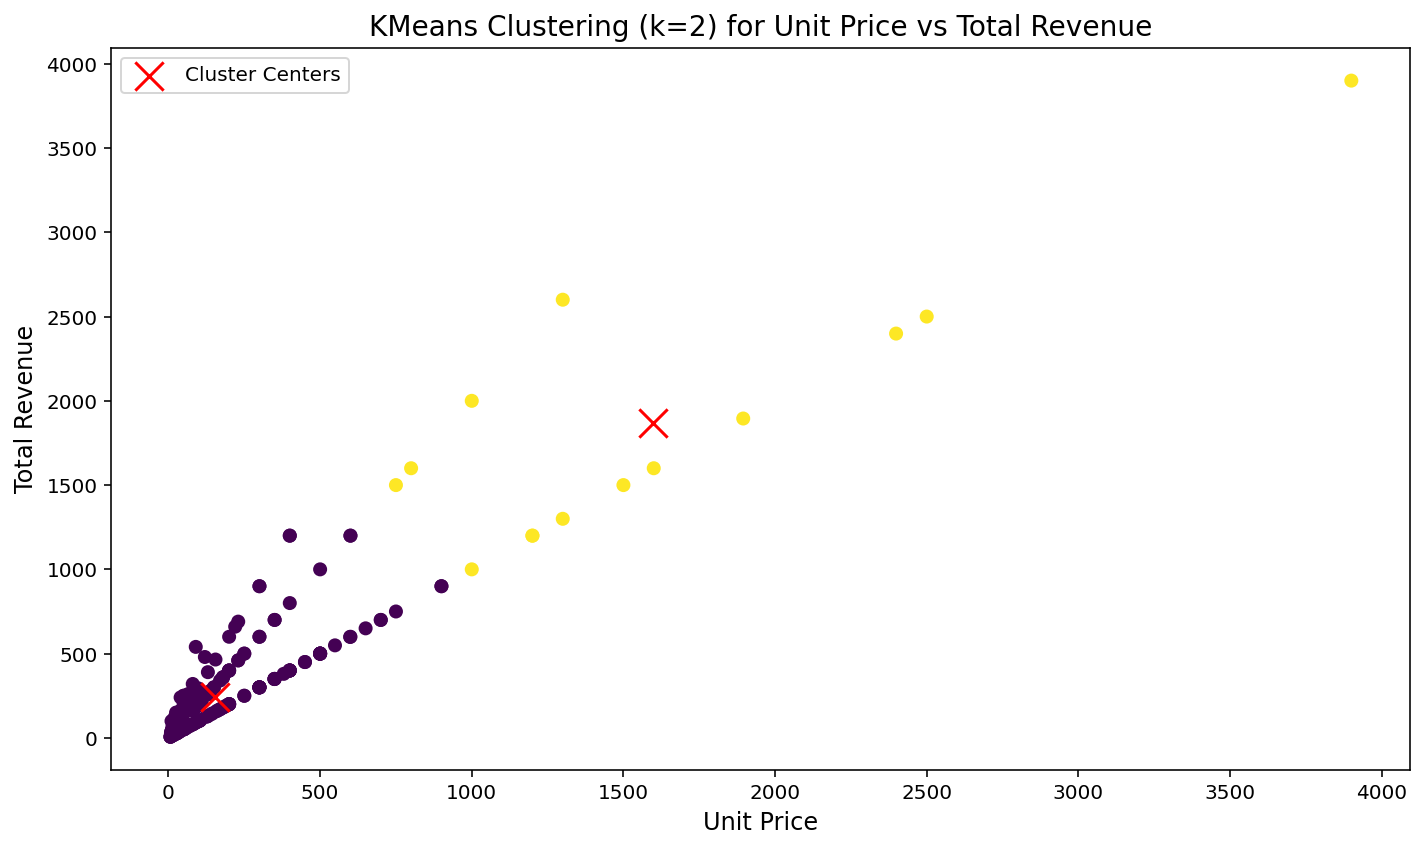

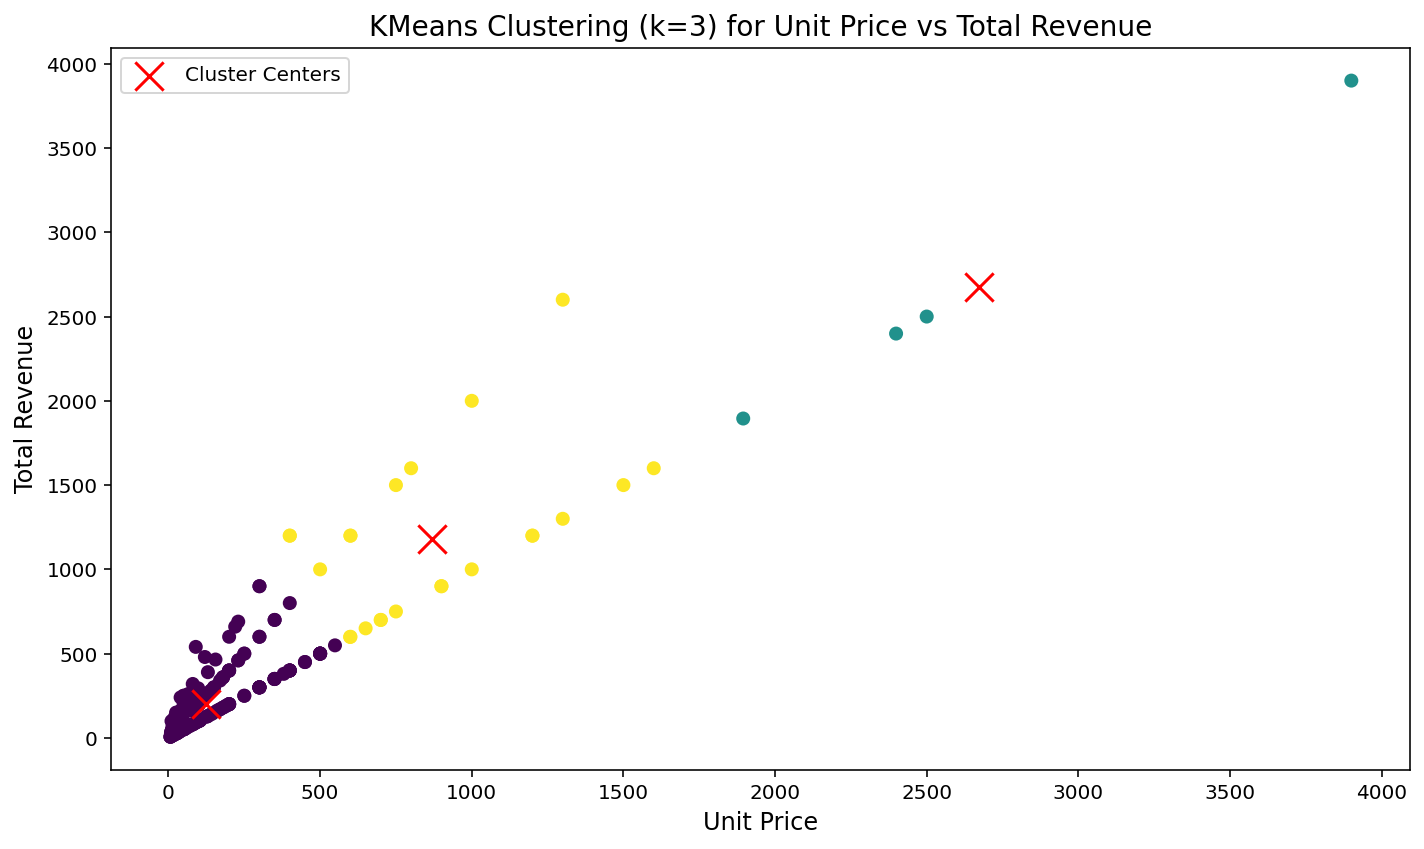

In [47]:
def perform_kmeans_clustering(original_data, normalized_data, scaler, cluster_range):
    """
    Performs K-Means clustering for a given range of k values and visualizes the results.
    Parameters: original_data (ndarray), normalized_data (ndarray), scaler (RobustScaler), cluster_range (iterable).
    """
    for k in cluster_range:
        # Initialize and fit K-Means with the current number of clusters
        kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(normalized_data)
        
        # Retrieve cluster labels and cluster centers
        labels = kmeans.labels_
        centers = scaler.inverse_transform(kmeans.cluster_centers_)
        x_centers = centers[:, 0]
        y_centers = centers[:, 1]
        
        # Plot the results for the current k value
        plt.figure(figsize=(10, 6), dpi=144)
        plt.scatter(original_data['Unit Price'], original_data['Total Revenue'], c=labels, cmap='viridis', marker='o')
        plt.scatter(x_centers, y_centers, c='red', marker='x', s=200, label='Cluster Centers')
        plt.title(f'KMeans Clustering (k={k}) for Unit Price vs Total Revenue', fontsize=14)
        plt.xlabel('Unit Price', fontsize=12)
        plt.ylabel('Total Revenue', fontsize=12)
        plt.legend()
        plt.tight_layout()
        plt.show()

# Perform clustering for k = 2 to 3
perform_kmeans_clustering(data_for_clustering, scaled_data, scaler, cluster_range=range(2, 4))
